# Asking Questions and Analyzing

## Import các thư viện cần thiết và đọc các file dữ liệu

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
manga_df = pd.read_csv('./Data/manga.csv')
manga_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaN,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaN,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic...",['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype'],True
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaN,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaN,"['Action', 'Adventure', 'Fantasy']",[],['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military'],['Shounen'],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",['Shounen Gangan'],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"['Full Metal Alchemist', 'Hagane no Renkinjuts...",True
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"['Action', 'Adventure', 'Horror', 'Mystery', '...",['Historical'],"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ...",True
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"['Drama', 'Slice of Life']",['Psychological'],['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,NaN,0,currently_publishing,NaN,NaN,2022-07-25,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2022-07-25,NaN,"['Horror', 'Supernatural', 'Suspense']",[],['Seinen'],[],[],NaN,NaN,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,NaN,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,NaN,0,currently_publishing,NaN,NaN,2020-09-30,NaN,0,0,True,False,2022-07-25 00:02:54+00:00,NaN,2020-09-30,NaN,"['Action', 'Adventure', 'Fantasy']",[],[],[],[],"Ars, the prince of the Kingdom of Karit

In [3]:
author_df = pd.read_csv('./Data/author.csv')
author_df

,id,first_name,last_name,role
0,1938,Osamu,Tezuka,['Art' 'Story' 'Story & Art']
1,2992,Go,Nagai,['Art' 'Story' 'Story & Art']
2,3284,Ryuu,Sugahara,['Art' 'Story & Art']
3,2552,Mi Ri,Hwang,['Art' 'Story' 'Story & Art']
4,25075,Nano,Aiuchi,['Story']
...,...,...,...,...
23436,39231,Kei,Inayoshi,['Story']
23437,39232,Kaisei,Kishi,['Story & Art']
23438,39245,Tsukumo,Abe,['Story & Art']
23439,39246,NaN,Bowie Knife,['Story & Art']


---

## **_01. Asking Meaningfull Questions:_**

### **_01.1. Câu hỏi 01: Hệ thống khuyến nghị_**

- **Nội dung**: Những bộ manga nào là phù hợp đối với mỗi đối tượng (`demographics`)?
- **Mục đích**: Cải thiện hệ thống khuyến nghị (recommendation system) của MAL.
- **Phân tích**:
    - Đầu tiên là tìm thể loại (`genres`) phổ biến nhất với từng đối tượng.
    - Sử dụng hồi quy tuyến tính dựa vào 3 đầu vào là `scored_by`, `members`, `favorites` để dự đoán `score`.
    - Đưa ra ngưỡng `score` khuyến nghị kết hợp với thể loại đã tìm được ở trên để recommend những manga mang tính khuyến nghị cao cho từng đối tượng.

### **_01.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

- **Nội dung**: Đâu là những thời điểm bùng nổ của manga, cũng như các `genres` và `themes` phổ biến nhất ở những thời điểm này, tỉ lệ bao nhiêu trong số đó đã thành công đến thời điểm hiện tại.
- **Mục đích**: Phân tích này mang ý nghĩa thông kê, phân tích để thấy được quá trình phát triển của của ngành công nghiệp manga, đồng thời cũng giúp so sánh với thời điểm hiện tại một phần giúp các mangaka chọn được thể loại và chủ đề sáng tác.
- **Phân tích**:
    - Đếm số manga bắt đầu mỗi năm dựa vào `real_start_date`, thời điểm bùng nổ là những vùng xung quanh cực đại.
    - Tìm các các `genres` và `themes` xuất hiện nhiều nhất trong những thời điểm này.
    - Tìm các bộ manga thuộc các thời điểm, thể loại, chủ đề và dựa vào ngưỡng `score` (lấy score đã có, nếu chưa được đánh giá ta sẽ dùng score dự đoán có được ở câu hỏi 1) được chọn để đánh giá sự thành công của nó.

### **_01.3. Câu hỏi 03: Xếp hạng các mangaka_**

- **Nội dung**: Đánh giá sự cống hiến cũng như thành công của một mangaka (`authors`) dựa trên hai yếu tố: số bộ manga (`manga_id`) mà người đó tham gia (Story hoặc Art hoặc cả hai) và sự thành công của những bộ đó (`score`).
- **Mục đích**: Tìm những mangaka cống hiến nhiều nhất để xếp hạng, trao thưởng, tri ân.
- **Phân tích**:
    - Tính số manga mà mỗi tác giả đã tham gia.
    - Mỗi mangaka sẽ có hai chỉ số:
        - Chỉ số thứ nhất: tính bằng trung bình cộng của tất cả các `score` của tất cả các bộ manga mà mangaka đó tham gia.
        - Chỉ số thứ hai: là số manga mà tác giả đó tham gia.
    - Chuẩn hóa hai chỉ số về dạng thích hợp.
    - Tính tổng của tích chỉ số với trọng số (mỗi chỉ số sẽ có trọng số tương ứng để thể hiện mức độ ảnh hưởng), output sẽ là mức độ cống hiển, thành công của một mangaka.
    - Sau đó ta sẽ lấy ra những mangaka có output cao nhất.

## **_02. Pre-processing Data:_**

Phần code này thực hiện:
- Lấy lại code tiền xử lí từ file _02_Exploring-and-Preprocessing-Data.ipynb_ cho manga_df
- Tiền xử lí cho author_df
- Lấy lại code phân bổ các cột số và loại

**Tiền xử lí cho manga_df**

In [4]:
# Chuyen ve kieu datetime bang pd.to_datetime
manga_df['start_date'] = pd.to_datetime(manga_df['start_date'], format='%Y-%m-%d')
manga_df['end_date'] = pd.to_datetime(manga_df['end_date'], format='%Y-%m-%d')
manga_df['created_at_before'] = pd.to_datetime(manga_df['created_at_before'])
manga_df['updated_at'] = pd.to_datetime(manga_df['updated_at'], format='%Y-%m-%d %H:%M:%S')
manga_df['real_start_date'] = pd.to_datetime(manga_df['real_start_date'])
manga_df['real_end_date'] = pd.to_datetime(manga_df['real_end_date'])

# Chuyen ve str array bang ast.literal_eval
manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']] = \
    manga_df[['genres', 'themes', 'demographics', 'authors', 'serializations', 'title_synonyms']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']] = \
    manga_df[['synopsis', 'background', 'main_picture', 'title_english', 'title_japanese']].replace(to_replace=np.nan, value='')

**Tiền xử lí cho author_df**

In [5]:
# Chuyen ve str array bang ast.literal_eval
author_df[['first_name', 'last_name']] = author_df[['first_name', 'last_name']].replace(to_replace=np.nan, value='')

# Chuyen ve str (voi nhung val da la str thi giu nguyen, voi nhung val la nan thi thay bang chuoi rong)
author_df[['role']] = author_df[['role']].apply(lambda col : col.apply(ast.literal_eval), axis=1)

**Phân bổ các cột numerical**

In [6]:
nume_cols = ['score', 'scored_by', 'volumes', 'chapters', 'start_date', 'end_date', 'members', 'favorites', 'created_at_before', 'updated_at', 'real_start_date', 'real_end_date']

missing_percentages = np.sum(manga_df[nume_cols].isna(), axis=0) / manga_df.shape[0] * 100
mins = manga_df[nume_cols].quantile(0, numeric_only=False)
medians = manga_df[nume_cols].quantile(0.5, numeric_only=False)
maxs = manga_df[nume_cols].quantile(1, numeric_only=False)

nume_cols_dist_df = pd.DataFrame(data=[missing_percentages, mins, medians, maxs],
                                       index=['Missing percentage', 'Min', 'Median', 'Max'],
                                       columns=nume_cols)
nume_cols_dist_df

,score,scored_by,volumes,chapters,start_date,end_date,members,favorites,created_at_before,updated_at,real_start_date,real_end_date
Missing percentage,67.431213,0.0,24.941656,29.994203,6.427542,23.117744,0.0,0.0,0.0,12.311031,6.427542,23.117744
Min,2.450000,0.0,1.000000,1.000000,1922-01-01 00:00:00,1924-10-31 00:00:00,0.0,0.0,2007-07-17 20:14:45+00:00,2007-07-17 20:14:45+00:00,1922-01-01 00:00:00,1924-10-31 00:00:00
Median,6.940000,25.0,1.000000,9.000000,2012-06-12 00:00:00,2012-12-13 00:00:00,125.0,0.0,2015-03-26 12:32:05+00:00,2020-11-19 21:09:29+00:00,2012-06-12 00:00:00,2012-12-13 00:00:00
Max,9.450000,363368.0,200.000000,6477.000000,2022-10-14 00:00:00,2022-08-09 00:00:00,590241.0,103820.0,2022-07-25 17:32:10.227760896+00:00,2022-07-25 04:59:06+00:00,2022-10-14 00:00:00,2022-08-09 00:00:00


**Phân bổ các cột id và kiểu bool**

In [7]:
num_col_profiles_df = pd.DataFrame({'manga_id': [.0] * 3,
                                    'sfw': [.0] * 3,
                                    'approved': [.0] * 3,
                                    'jikan': [.0] * 3},
                                   index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

num_col_profiles_df.loc['Missing_ratio'] = np.sum(manga_df[num_col_profiles_df.columns].isnull(), axis=0) / manga_df.shape[0] * 100
num_col_profiles_df.loc['Num_diff_vals'] = manga_df[num_col_profiles_df.columns][~manga_df[num_col_profiles_df.columns].isnull()].nunique()
num_col_profiles_df.loc['Diff_vals'] = manga_df[num_col_profiles_df.columns].apply(lambda col: col.dropna().unique())
num_col_profiles_df

,manga_id,sfw,approved,jikan
Missing_ratio,0.0,0.0,0.0,0.0
Num_diff_vals,67273,2,2,2
Diff_vals,"[2, 13, 25, 1706, 4632, 656, 642, 56805, 90125...","[True, False]","[True, False]","[True, False]"


**Phân bổ các cột kiểu str**

In [8]:
str_col_profiles_df = pd.DataFrame({'title': [.0] * 3,
                                    'type': [.0] * 3,
                                    'status': [.0] * 3,
                                    'synopsis': [.0] * 3,
                                    'background': [.0] * 3,
                                    'main_picture': [.0] * 3,
                                    'url': [.0] * 3,
                                    'title_english': [.0] * 3,
                                    'title_japanese': [.0] * 3},
                                    index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

str_col_profiles_df.loc['Missing_ratio'] = np.sum(manga_df[str_col_profiles_df.columns] == '', axis=0) / manga_df.shape[0] * 100
str_col_profiles_df.loc['Num_diff_vals'] = manga_df[str_col_profiles_df.columns][manga_df[str_col_profiles_df.columns] != ''].nunique()
str_col_profiles_df.loc['Diff_vals'] = manga_df[str_col_profiles_df.columns].apply(lambda col: col[col != ''].unique())
str_col_profiles_df

,title,type,status,synopsis,background,main_picture,url,title_english,title_japanese
Missing_ratio,0.0,0.0,0.0,32.186761,86.117759,3.628499,0.0,72.608625,3.983768
Num_diff_vals,63987,7,5,44495,9294,64832,67273,17542,62172
Diff_vals,"[Berserk, One Piece, Fullmetal Alchemist, JoJo...","[manga, manhwa, light_novel, one_shot, manhua,...","[currently_publishing, finished, on_hiatus, di...","[Guts, a former mercenary now known as the ""Bl...",[Berserk won the Award for Excellence at the s...,[https://cdn.myanimelist.net/images/manga/1/15...,"[https://myanimelist.net/manga/2/Berserk, http...","[Berserk, One Piece, Fullmetal Alchemist, Good...","[ベルセルク, ONE PIECE, 鋼の錬金術師, ジョジョの奇妙な冒険 Part7 ST..."


**Phân bổ các cột kiểu str array**

In [9]:
str_arr_col_profiles_df = pd.DataFrame({'genres': [.0] * 3,
                                        'themes': [.0] * 3,
                                        'demographics': [.0] * 3,
                                        'authors': [.0] * 3,
                                        'serializations': [.0] * 3,
                                        'title_synonyms': [.0] * 3},
                                       index=['Missing_ratio', 'Num_diff_vals', 'Diff_vals'], dtype=object)

# Cac cot (ngoai tru authors va title_synonyms)
str_arr_col_profiles_df.loc['Missing_ratio'] = \
    np.sum(manga_df[str_arr_col_profiles_df.columns].apply(lambda col: col.apply(len)) == 0) / manga_df.shape[0] * 100
str_arr_col_profiles_df.loc['Diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    manga_df[str_arr_col_profiles_df.columns].apply(np.concatenate)[['genres', 'themes', 'demographics', 'serializations']].apply(np.unique)
str_arr_col_profiles_df.loc['Num_diff_vals'][['genres', 'themes', 'demographics', 'serializations']] = \
    str_arr_col_profiles_df.loc['Diff_vals'][['genres', 'themes', 'demographics', 'serializations']].apply(len)

# Cot authors
str_arr_col_profiles_df.loc['Diff_vals', 'authors'] = \
    np.array(author_df['first_name'] + ' ' + author_df['last_name'])
str_arr_col_profiles_df.loc['Num_diff_vals', 'authors'] = \
    str_arr_col_profiles_df.loc['Diff_vals', 'authors'].size

# Cot title_synonyms
str_arr_col_profiles_df.loc['Diff_vals', 'title_synonyms'] = \
    np.array(pd.Series(manga_df['title_synonyms'][manga_df['title_synonyms'].apply(len) != 0].apply(' ###'.join).unique()).str.split(' ###'))
str_arr_col_profiles_df.loc['Num_diff_vals', 'title_synonyms'] = \
    str_arr_col_profiles_df.loc['Diff_vals', 'title_synonyms'].size

str_arr_col_profiles_df

,genres,themes,demographics,authors,serializations,title_synonyms
Missing_ratio,4.701738,64.846224,59.893271,11.182793,38.941329,51.335603
Num_diff_vals,21,52,5,23441,1162,32053
Diff_vals,"[Action, Adventure, Avant Garde, Award Winning...","[Adult Cast, Anthropomorphic, CGDCT, Childcare...","[Josei, Kids, Seinen, Shoujo, Shounen]","[Osamu Tezuka, Go Nagai, Ryuu Sugahara, Mi Ri ...","[&.Emo, &Flower, .Bloom, .hack//G.U. The World...","[[Berserk: The Prototype], [Full Metal Alchemi..."


## **_03. Analyzing Data to Answer each Question:_**

### **_03.1. Câu hỏi 01: Hệ thống khuyến nghị_**

#### **_03.1.1. Pre-process Data:_**

**Tạo cột mới**

Tạo cột `score_predict` cho manga_df: trả về True nếu score của manga đó là np.nan (sau này sẽ được thay thế bằng giá trị dự đoán) và False nếu manga đó đã có score

In [10]:
manga_df['score_predict'] = np.isnan(manga_df['score'])

**Splitiing data**

Split phần dữ liệu đã có score ra thành 2 sets: train-test (với tỉ lệ 70-30)

In [11]:
X_df = manga_df[~np.isnan(manga_df['score'])][['scored_by', 'members', 'favorites']]
y_sr = manga_df[~np.isnan(manga_df['score'])]['score']

train_X_df, test_X_df, train_y_sr, test_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

#### **_03.1.2. Analyzing:_**

**Step 1: Đầu tiên là tìm thể loại (`genres`) phổ biến nhất với từng đối tượng**

Với mỗi đối tượng ta sẽ tìm 3 thể loại xuất hiện nhiều nhất

In [12]:
dmgs = str_arr_col_profiles_df.loc['Diff_vals']['demographics']
q1_dic = dict()

for d in dmgs:
    demograph_df = manga_df[manga_df['demographics'].apply(lambda col: np.any(np.isin(np.array(col), d)))]
    temp_df = demograph_df.reset_index().drop(columns='index')
    q1_dic[d] = temp_df['genres'].explode().value_counts()[:3].keys().tolist()
    
q1_dic

{'Josei': ['Romance', 'Drama', 'Slice of Life'],
 'Kids': ['Comedy', 'Adventure', 'Action'],
 'Seinen': ['Comedy', 'Drama', 'Action'],
 'Shoujo': ['Romance', 'Comedy', 'Drama'],
 'Shounen': ['Comedy', 'Action', 'Fantasy']}

**Step 2: Sử dụng hồi quy tuyến tính dựa vào 3 đầu vào là scored_by, members, favorites để dự đoán score**

_Biểu đồ boxplot của những manga đã có `score`_

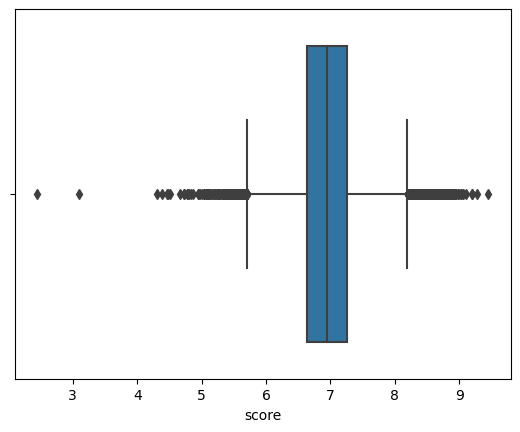

In [13]:
sns.boxplot(x=manga_df['score']);

_Trainning model_:
- Đầu tiên, ta tạo pipeline gồm các bước chuẩn hóa, thêm polynomial features và cuối cùng là áp dụng linear regression
- Để có thể chọn được mô hình với tham số tốt nhất, ở đây ta dùng GridSearchCV của 20 candidates và có 10 folds
- Sau đó, ta sẽ fit trên grid để tìm bộ tham số tốt nhất

In [14]:
def PolynomialRegression(degree=1, **kwargs):
    return make_pipeline(StandardScaler(), PolynomialFeatures(degree), LinearRegression(**kwargs))

param_grid = {'polynomialfeatures__degree': [1, 2, 3, 4, 5], 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]}
poly_grid = GridSearchCV(PolynomialRegression(), param_grid, cv=10, scoring='neg_mean_squared_error')
poly_grid.fit(train_X_df, train_y_sr)

print('Best Score: %s' % poly_grid.best_score_)
print('Best Hyperparameters: %s' % poly_grid.best_params_)

Best Score: -0.21865800227388804
Best Hyperparameters: {'linearregression__fit_intercept': True, 'linearregression__normalize': True, 'polynomialfeatures__degree': 1}


- Dựa trên bộ tham số này ta sẽ tạo pipeline tương ứng
- Fit bộ dữ liệu train trên pipeline này và thực hiện dự đoán dựa trên test

In [15]:
pipe_polreg = PolynomialRegression(degree=poly_grid.best_params_['polynomialfeatures__degree'],
                                   fit_intercept=poly_grid.best_params_['linearregression__fit_intercept'],
                                   normalize=poly_grid.best_params_['linearregression__normalize'])

pipe_polreg.fit(train_X_df, train_y_sr)
y_pred = pipe_polreg.predict(test_X_df)

print('RMSE: %s' % mean_squared_error(test_y_sr, y_pred, squared=False))
print('MSE: %s' % mean_squared_error(test_y_sr, y_pred))
print('MAE: %s' % mean_absolute_error(test_y_sr, y_pred))
print('Model score:', pipe_polreg.score(test_X_df, y_pred))

RMSE: 0.4637510550640933
MSE: 0.2150650410730597
MAE: 0.3557884131243798
Model score: 1.0


- Thực hiện dự đoán trên những score còn thiếu

In [16]:
score_pred = pipe_polreg.predict(manga_df[np.isnan(manga_df['score'])][['scored_by', 'members', 'favorites']])
score_pred = score_pred[:, np.newaxis]
manga_df.loc[np.isnan(manga_df['score']), ['score']] = np.round_(score_pred, 2)
print('Dataframe sau khi thêm score dự đoán:')
manga_df

Dataframe sau khi thêm score dự đoán:


,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan,score_predict
0,2,Berserk,manga,9.45,268737,currently_publishing,NaN,NaN,1989-08-25,NaT,551266,103820,True,True,2007-07-17 20:14:45+00:00,2022-06-23 08:30:44+00:00,1989-08-25,NaT,"[Action, Adventure, Award Winning, Drama, Fant...","[Gore, Military, Mythology, Psychological]",[Seinen],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",[Young Animal],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,[Berserk: The Prototype],True,False
1,13,One Piece,manga,9.20,305917,currently_publishing,NaN,NaN,1997-07-22,NaT,501291,99526,True,True,2007-07-17 20:14:45+00:00,2022-04-18 04:48:35+00:00,1997-07-22,NaT,"[Action, Adventure, Fantasy]",[],[Shounen],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",[Shounen Jump (Weekly)],"Gol D. Roger, a man referred to as the ""Pirate...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[],True,False
2,25,Fullmetal Alchemist,manga,9.05,143879,finished,27.0,116.0,2001-07-12,2010-09-11,264571,28519,True,True,2007-07-17 20:14:45+00:00,2022-06-13 18:46:09+00:00,2001-07-12,2010-09-11,"[Action, Adventure, Award Winning, Drama, Fant...",[Military],[Shounen],"[{'id': 1874, 'first_name': 'Hiromu', 'last_na...",[Shounen Gangan],Alchemists are knowledgeable and naturally tal...,Hagane no Renkinjutsushi won the 49th Shogakuk...,https://cdn.myanimelist.net/images/manga/3/243...,https://myanimelist.net/manga/25/Fullmetal_Alc...,Fullmetal Alchemist,鋼の錬金術師,"[Full Metal Alchemist, Hagane no Renkinjutsush...",True,False
3,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.27,125482,finished,24.0,96.0,2004-01-19,2011-04-19,209123,35456,True,True,2007-10-07 08:14:20+00:00,2022-04-18 04:02:35+00:00,2004-01-19,2011-04-19,"[Action, Adventure, Horror, Mystery, Supernatu...",[Historical],"[Seinen, Shounen]","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",[Ultra Jump],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,[JoJo's Bizarre Adventure Part 7: Steel Ball R...,True,False
4,4632,Oyasumi Punpun,manga,9.03,141146,finished,13.0,147.0,2007-03-15,2013-11-02,354176,43168,True,True,2008-02-03 15:54:30+00:00,2022-04-18 04:47:05+00:00,2007-03-15,2013-11-02,"[Drama, Slice of Life]",[Psychological],[Seinen],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",[Big Comic Spirits],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/164...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[],True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67268,149662,Scary Campus College University,manga,6.89,0,currently_publishing,NaN,NaN,2022-07-25,NaT,0,0,True,False,2022-07-25 00:02:54+00:00,NaT,2022-07-25,NaT,"[Horror, Supernatural, Suspense]",[],[Seinen],[],[],,,https://cdn.myanimelist.net/images/manga/1/265...,https://myanimelist.net/manga/149662,,スケアリー・キャンパス・カレッジ・ユニバーシティ,[],False,True
67269,149663,"Dorei Tensei: Sono Dorei, Saikyou no Moto Ouji...",light_novel,6.89,0,currently_publishing,NaN,NaN,2020-09-30,NaT,0,0,True,False,2022-07-25 00:02:54+00:00,NaT,2020-09-30,NaT,"[Action, Adventure, Fantasy]",[],[],[],[],"Ars, the prince of the Kingdom of Karitz, who ...",,https://

_Biểu đồ boxplot của **`score` dự đoán**. Ta có thể thấy so với boxplot của **`score` có sẵn** ở trên thì biểu đồ này có dữ liệu lệch về bên trái_
- Có thể giải thích điều này bởi vì những bộ chưa có score thường ít được quan tâm và mô hình sẽ dự đoán giá trị lệch trái (điểm thấp hơn), từ đó ta thấy mô hình tìm được là hợp lí và đúng

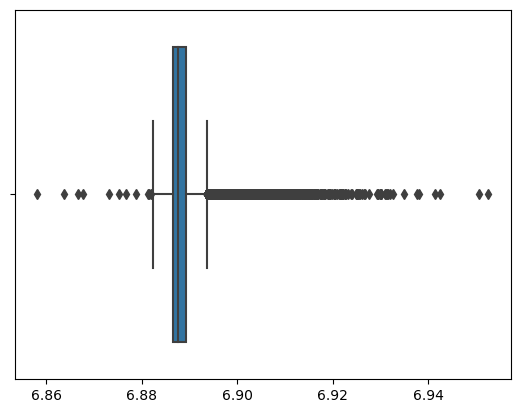

In [17]:
sns.boxplot(x=score_pred);

**Step 3: Đưa ra ngưỡng score khuyến nghị kết hợp với thể loại đã tìm được ở trên để recommend những manga mang tính khuyến nghị cao cho từng đối tượng**

- Đầu tiên ta sẽ cho rằng những manga mang tính khuyến nghị cao sẽ là những manga có `score` bằng hoặc cao hơn thresh_score = 8.
- Sau đó với từng manga, ta sẽ kiểm tra xem đối tượng (`demographics`) đang xét có nằm trong list đối tượng của manga đó hay không, 3 thể loại (`genres`) xuất hiện nhiều nhất tìm được ở trên có nằm trong list thể loại của manga đó hay không và cuối cùng là manga phải có `score` >= thresh_score.
- Từ đó tạo ra được một dictionary với keys là các đối tượng và values là list các id (`manga_id`) của manga khuyến nghị cho đối tượng đó.

In [18]:
thresh_score = 8

dmgs_df = manga_df['demographics'].explode().reset_index()
gnrs_df = manga_df['genres'].explode().reset_index()
df = pd.merge(dmgs_df, gnrs_df)
recommended_dic = dict()

for key in q1_dic.keys():
    result_df = df.loc[(df['demographics'] == key) & (np.any(np.isin(q1_dic[key], df['genres'])))]
    recommended_dic[key] = result_df['index'].unique().tolist()

Xem thử một số manga được khuyến nghị cho từng đối tượng
- Ta có thể thấy những bộ nổi tiếng đều có tên trong danh sách này, vì vậy hệ thống khuyến nghị là tốt

In [19]:
for key in recommended_dic.keys():
    print(key, ': ', manga_df.loc[recommended_dic[key][:5]]['title'].tolist())

Josei :  ['Paradise Kiss', 'Chihayafuru', 'Sakamichi no Apollon', 'Kuragehime', 'Nodame Cantabile']
Kids :  ['Pocket Monsters Special', 'Doraemon', 'Daichouhen Doraemon', 'Among Us', 'Pokémon DP: Pocket Monsters Diamond Pearl Monogatari']
Seinen :  ['Berserk', 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run', 'Oyasumi Punpun', 'Vagabond', 'Vinland Saga']
Shoujo :  ['Akatsuki no Yona', 'Fruits Basket', 'Nana', 'Ouran Koukou Host Club', 'Skip Beat!']
Shounen :  ['One Piece', 'Fullmetal Alchemist', 'JoJo no Kimyou na Bouken Part 7: Steel Ball Run', 'Koe no Katachi', 'Chainsaw Man']


Trực quan hóa bằng barplot

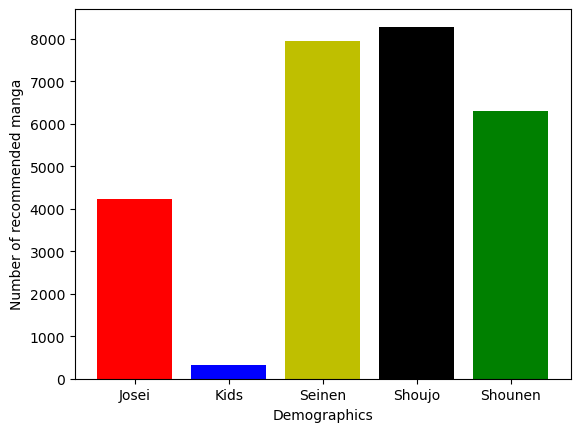

In [20]:
rec_ids_lst = list(recommended_dic.values())
len_rec = []
for l in rec_ids_lst:
    len_rec.append(len(l))
    
plt.bar(list(recommended_dic.keys()), len_rec, color=['r', 'b', 'y', 'k', 'g'])
plt.xlabel('Demographics')
plt.ylabel('Number of recommended manga');

#### **_03.1.3. Ghi dataset bao gồm score đã dự đoán vào new_manga.csv:_**

In [21]:
# manga_df.to_csv('./Data/new_manga.csv', index=False)

### **_03.2. Câu hỏi 02: Thởi điểm bùng nổ manga_**

_Vì bộ dữ liệu lấy về có thể không chứa toàn bộ các bộ manga, nên phân tích ở câu này không phản ánh chính xác hoàn toàn sự phát triển của ngành manga, nhưng vẫn có thể dùng để tham khảo._

#### **_03.2.1. Pre-process Data:_**

Tạo cột `real_start_year` được trích xuất từ year của cột `real_start_date` để thuận tiện cho tính toán câu 2

In [22]:
manga_df['real_start_year'] = pd.DatetimeIndex(manga_df['real_start_date']).year

#### **_03.2.2. Analyzing:_**

**Step 1: Trước tiên ta sẽ xem số manga có cùng thời điểm bắt đầu `real_start_date` cho mỗi 2 năm**

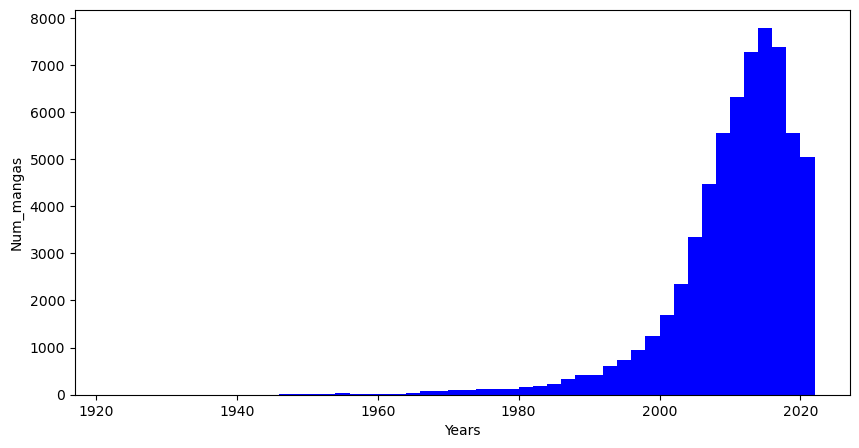

In [23]:
num_manga_fig, num_manga_ax = plt.subplots(figsize=(10, 5))
num_manga_ax.set_xlabel('Years')
num_manga_ax.set_ylabel('Num_mangas')
num_manga_hist = num_manga_ax.hist(manga_df['real_start_year'], bins=50, color='b')

In [25]:
print('Total:', np.sum((manga_df['real_start_year'] >= 2012) & (manga_df['real_start_year'] <= 2017)))
print('From:', num_manga_hist[1][num_manga_hist[0].argmax() - 1], 'to', num_manga_hist[1][num_manga_hist[0].argmax() + 2] - 1)

Total: 22431
From: 2012.0 to 2017.0


Qua thực tế và đồ thị, ta thấy rằng ngành công nghiệp manga đã, đang và sẽ tiếp tục phát triển mạnh mẽ.Nhưng để phân tích thời điểm có nhiều bộ manga bắt đầu nhất, từ đồ thị ta sẽ lấy ra 3 cột cao nhất (có giá trị lớn hơn 7.000 manga). Ba cột này thuộc các năm từ 2012 đến 2017

Có thể thấy tuy chỉ 6 năm (~6% khoảng thời gian từ min = 1922 đến max = 2022) nhưng số bộ manga trong dataset thuộc khoảng thời gian này chiếm ~33% (22.431 trên tổng số 67.273)

Ta sẽ lấy ra những bộ manga thuộc khoảng thời gian này và lưu vào manga_boom_df

In [26]:
manga_boom_df = manga_df[(manga_df['real_start_year'] >= 2012) & (manga_df['real_start_year'] <= 2017)]
manga_boom_df

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,approved,created_at_before,updated_at,real_start_date,real_end_date,genres,themes,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms,jikan,score_predict,real_start_year
7,56805,Koe no Katachi,manga,8.86,132459,finished,7.0,64.0,2013-08-07,2014-11-19,244653,21260,True,True,2013-08-05 16:25:39+00:00,2022-04-18 05:00:47+00:00,2013-08-07,2014-11-19,"[Award Winning, Drama]",[Romantic Subtext],[Shounen],"[{'id': 10951, 'first_name': 'Yoshitoki', 'las...",[Shounen Magazine (Weekly)],"Shouya Ishida, a mischievous elementary school...","Before Koe no Katachi was serialized, the Japa...",https://cdn.myanimelist.net/images/manga/1/120...,https://myanimelist.net/manga/56805/Koe_no_Kat...,A Silent Voice,聲の形,[The Shape of Voice],True,False,2013.0
8,90125,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,manga,8.92,98602,currently_publishing,NaN,NaN,2015-05-19,NaT,223578,25182,True,True,2015-06-07 08:34:21+00:00,2022-04-18 05:07:31+00:00,2015-05-19,NaT,"[Award Winning, Comedy]","[Romantic Subtext, School]",[Seinen],"[{'id': 2139, 'first_name': 'Aka', 'last_name'...",[Young Jump],Considered a genius due to having the highest ...,Kaguya-sama wa Kokurasetai: Tensai-tachi no Re...,https://cdn.myanimelist.net/images/manga/3/188...,https://myanimelist.net/manga/90125/Kaguya-sam...,Kaguya-sama: Love is War,かぐや様は告らせたい～天才たちの恋愛頭脳戦～,[Kaguya Wants to be Confessed To: The Geniuses...,True,False,2015.0
11,44347,One Punch-Man,manga,8.74,195826,currently_publishing,NaN,NaN,2012-06-14,NaT,403311,33224,True,True,2012-10-22 09:02:38+00:00,2022-04-18 04:45:56+00:00,2012-06-14,NaT,"[Action, Comedy]","[Parody, Super Power]",[Seinen],"[{'id': 1903, 'first_name': 'Yusuke', 'last_na...",[Tonari no Young Jump],"After rigorously training for three years, the...",One Punch-Man is the manga remake of the origi...,https://cdn.myanimelist.net/images/manga/3/806...,https://myanimelist.net/manga/44347/One_Punch-Man,One-Punch Man,ワンパンマン,"[Onepunchman, Onepanman, OPM]",True,False,2012.0
14,35243,Haikyuu!!,manga,8.84,89090,finished,45.0,407.0,2012-02-20,2020-07-20,187357,16347,True,True,2012-03-09 09:27:52+00:00,2022-04-24 17:16:37+00:00,2012-02-20,2020-07-20,"[Award Winning, Sports]","[School, Team Sports]",[Shounen],"[{'id': 8260, 'first_name': 'Haruichi', 'last_...",[Shounen Jump (Weekly)],The whistle blows. The ball is up. A dig. A se...,Haikyuu!! won the 61st Shogakukan Manga Award ...,https://cdn.myanimelist.net/images/manga/2/258...,https://myanimelist.net/manga/35243/Haikyuu,Haikyu!!,ハイキュー!!,"[High Kyuu!!, HQ!!, Nisekyuu!!]",True,False,2012.0
18,70345,Grand Blue,manga,9.03,55772,currently_publishing,NaN,NaN,2014-04-07,NaT,148627,15107,True,True,2014-04-09 23:11:57+00:00,2022-07-18 22:19:10+00:00,2014-04-07,NaT,[Comedy],[],[Seinen],"[{'id': 7108, 'first_name': 'Kenji', 'last_nam...",[good! Afternoon],Among the seaside town of Izu's ocean waves an...,Grand Blue has been published digitally in Eng...,https://cdn.myanimelist.net/images/manga/2/166...,https://myanimelist.net/manga/70345/Grand_Blue,Grand Blue Dreaming,ぐらんぶる,[],True,False,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67235,149598,Colorless Girl,manga,6.89,0,finished,3.0,15.0,2017-06-05,2021-09-15,0,0,True,False,2022-07-23 17:53:09+00:00,NaT,2017-06-05,2021-09-15,[Drama],[School],[Josei],[],[],"Aoi is a perfect, beautiful girl who is always...",,https://cdn.myanimelist.net/images/manga/2/265...,https://myanimelist.net/manga/149598,,カラーレスガール,[],False,True,2017.0
67241,149606,Jiseul,manhwa,6.89,0,finished,1.0,10.0,2014-04-03,2014-04-03,0,0,True,False,2022-07-23 20:20:16+00:00,NaT,2014-04-03,2014-04-03,[Drama],[Historical],[],[],[],Keum-Suk Gendry-Kim's adaptation of O Muel's 2...,,https://cdn.myanimelist.net/images/manga/3/265...,https://myanimelist.n

**Step 2: Sau khi đã có khoảng thời gian cụ thể, ta sẽ phân tích 3 đặc điểm của thời kì này:**

_Thứ nhât: Thể loại genres và chủ đề themes phổ biến nhất ở thời kì bùng nổ và so sánh với tất cả thời điểm_

In [27]:
print("~~~ All of times:\n", manga_df['genres'].explode().value_counts()[:5], '\n')
print("~~~ Boom times:\n", manga_boom_df['genres'].explode().value_counts()[:5])

~~~ All of times:
 Romance    17622
Comedy     15015
Hentai     12215
Fantasy    10830
Drama       9915
Name: genres, dtype: int64 

~~~ Boom times:
 Romance      6000
Comedy       4642
Hentai       4557
Fantasy      3892
Boys Love    2918
Name: genres, dtype: int64


In [28]:
print("~~~ All of times:\n", manga_df['themes'].explode().value_counts()[:5], '\n')
print("~~~ Boom times:\n", manga_boom_df['themes'].explode().value_counts()[:5])

~~~ All of times:
 School           10661
Historical        2534
Harem             2332
Psychological     1688
Mythology          844
Name: themes, dtype: int64 

~~~ Boom times:
 School           3949
Harem            1016
Historical        620
Psychological     408
Mythology         230
Name: themes, dtype: int64


- Từ 2 đoạn code trên ta có thể thấy những thể loại và chủ đề xuất hiện nhiều nhất trong [2012, 2017] cũng xuất hiện nhiều nhất trong toàn bộ dataset

- Các thể loại và chủ đề như: Romance và School vẫn luôn chiếm phần lớn. Từ đó ta có thể thấy thời kì bùng nổ manga, cũng dẫn đến sự tăng mạnh các thể loại và chủ đề phổ biến nhất

_Thứ hai: Xem xét mean `score` của từng năm và so sánh với thời kì bùng nổ_

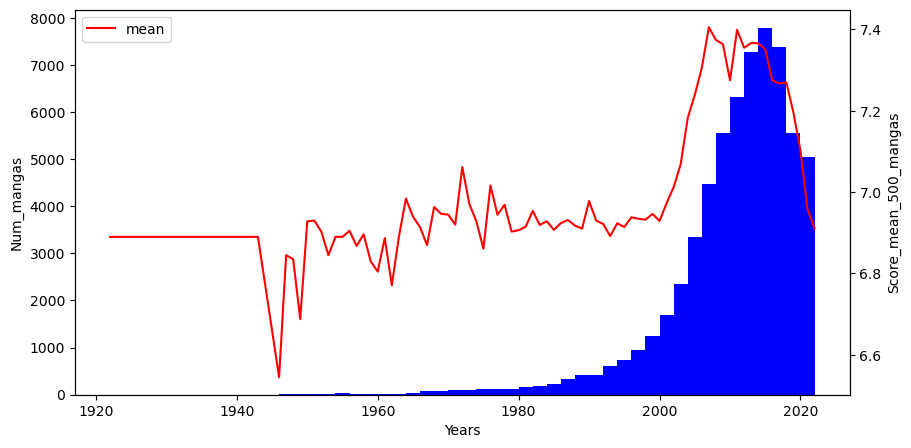

In [29]:
num_manga_score_fig, num_manga_score_x1 = plt.subplots(figsize=(10, 5))
num_manga_score_x1.set_xlabel('Years')
num_manga_score_x1.set_ylabel('Num_mangas')
num_manga_score_x1.hist(manga_df['real_start_year'], bins=50, color='b')

num_manga_score_x2 = num_manga_score_x1.twinx()
num_manga_score_x2.set_xlabel('Years')
num_manga_score_x2.set_ylabel('Score_mean_500_mangas')
num_manga_score_x2.plot(manga_df.groupby('real_start_year')['score'].agg(score_mean=lambda scores: np.nanmean(scores) if len(scores) < 500 else np.nanmean(scores[:500])), color='r', label='mean')
# num_manga_score_x2.plot(manga_df.groupby('real_start_year')['score'].agg(score_mean='max'), color='g', label='max')
# num_manga_score_x2.plot(manga_df.groupby('real_start_year')['score'].agg(score_mean='min'), color='y', label='min')
num_manga_score_x2.legend(loc='upper left')

- Biểu đồ trên thể hiện cột và đường (điểm trung bình của 500 manga thuộc top gần cao nhất)
- Nhìn chung cột và đường có sự tương quan nhau, điều đó thể hiện rằng khi số manga được xuất bản tăng (bùng nổ) dẫn theo điểm trung bình của top những manga cao nhất tăng (chất lượng tăng theo)
- Thời kì bùng nổ cũng là thời kì mà điểm trung bình của top500 gần cao nhất

_Thứ ba: Xem xét có bao nhiêu (%) manga ở thời kì này thành công đến thời điểm hiện tại (score >= 7.0)_

In [30]:
manga_boom_df[manga_boom_df['score'] >= 7].shape[0], np.round_(manga_boom_df[manga_boom_df['score'] >= 7].shape[0] / manga_boom_df.shape[0] * 100, 2)

(2857, 12.74)

- Có 2857 manga đã thành công và chiếm 12.74% trong tổng số manga ở thời kì đó

### **_03.3. Câu hỏi 03: Xếp hạng các mangaka_**

**Step 1: Tìm những manga mà các tác giả đã tham gia:**

- Đầu tiên tạo dataframe gồm 2 cột (cột đầu tiên `manga_index` là index của manga, cột thứ hai `author_id` là id của tác giả).
- Ở đây cột `manga_index` có thể lặp lại nhiều lần là do manga đó có nhiều tác giả tham gia sáng tác.
- Cột `author_id` bị thiếu một số giá trị do manga không có thông tin về tác giả.

In [155]:
def first(lst):
    return np.nan if len(lst) == 0 else lst[0]

str_author_sr = manga_df['authors'].explode().apply(lambda col: str(col))
author_id_sr = str_author_sr.str.findall(r'[0-9]+').apply(first)
manga_author_df = author_id_sr.to_frame().reset_index()
manga_author_df.columns = ['manga_index', 'author_id']
manga_author_df

,manga_index,author_id
0,0,1868
1,0,49592
2,1,1881
3,2,1874
4,3,2619
...,...,...
92067,67268,NaN
92068,67269,NaN
92069,67270,NaN
92070,67271,NaN


**Step 2: Tính các chỉ số trung bình score của hai manga cao điểm nhất và số manga tham gia đối với từng tác giả và scale hai chỉ số bằng min-max:**

- Từ đó dựa vào `manga_index` để lấy ra `score` của manga đó, được dataframe cũng gồm 2 cột (cột đầu tiên là id của tác giả, cột thứ hai là `score` của manga mà tác giả đó tham gia).
- Id của tác giả có thể lặp lại nếu như tác giả đó tham gia sáng tác nhiều manga.

In [165]:
q3_df = manga_author_df.copy()
q3_df['manga_score'] = manga_df.loc[q3_df['manga_index']]['score'].reset_index()['score']
q3_df = q3_df.drop(columns=['manga_index'])
q3_df = q3_df[~q3_df['author_id'].isna()]
q3_df = q3_df.reset_index().drop(columns='index')
q3_df

,author_id,manga_score
0,1868,9.45
1,49592,9.45
2,1881,9.20
3,1874,9.05
4,2619,9.27
...,...,...
84544,53367,6.89
84545,4526,6.89
84546,54409,6.89
84547,45352,6.89


- Tiếp đến tạo dataframe có cột index `author_id` là id tác giả và gồm 2 cột (cột đầu tiên `Mean` là điểm trung bình các manga mà tác giả này tham gia sáng tác, cột thứ hai `Count` là số lượng manga tác giả tham gia).
- Sau đó chuẩn hóa 2 cột bằng phương pháp scale min-max (ở đây ta cho min = 0 vì count nhỏ nhất của từng tác giả là 1, nên nếu dùng min = 1 thì kết quả sau scale là 0 tương đương với trọng số count không có đóng góp, trong khi đó tác giả vẫn có tham gia 1 bộ manga).

In [166]:
q3_df = q3_df.groupby('author_id')['manga_score'].agg(Mean_top2=lambda scores: np.flip(np.sort(scores))[:2].mean(),
                                                      Count=lambda scores: scores.size if scores.size < 10 else 10)
q3_df = (q3_df - 0) / (q3_df.max() - 0)
q3_df

,Mean_top2,Count
author_id,,
10000,0.804932,0.9
10009,0.755068,0.9
10010,0.755068,0.2
10018,0.755068,0.2
10026,0.755616,0.4
...,...,...
9977,0.755068,0.3
9979,0.755068,0.5
9996,0.808767,0.7


**Step 3: Tính tổng linear của 2 chỉ số với trọng số cho Mean_top2:Count là 0.8:0.2 và thực hiện sort từ cao đến thấp**

- Tính tổng tích của 2 cột này với trọng số của nó để ra được cột `Output` là mức độ cống hiến của tác giả đó.
- Cuối cùng cho cột index `Rank` là hạng của các mangaka.

In [167]:
q3_df['Output'] = q3_df['Mean_top2'] * 0.8 + q3_df['Count'] * 0.2
q3_df = q3_df.sort_values(by=['Output'], ascending=False).reset_index()
q3_df.index += 1
q3_df.index.name = 'Rank'
q3_df

,author_id,Mean_top2,Count,Output
Rank,,,,
1,1867,0.988493,1.0,0.990795
2,1868,0.981918,1.0,0.985534
3,5254,0.978630,1.0,0.982904
4,2619,0.978082,1.0,0.982466
5,12006,0.977534,1.0,0.982027
...,...,...,...,...
23437,3736,0.561096,0.1,0.468877
23438,13541,0.529315,0.1,0.443452
23439,45506,0.523836,0.1,0.439068


- Ta thử xem xét một vài kết quả:
    - 2 tác giả đầu bảng
    - Eiichiro Oda và Masashi Kishimoto (tác giả của bộ truyện nổi tiếng One Piece và Naruto)

In [248]:
# Tác giả top1
print("~~~~~Author:")
print(author_df[author_df['id'] == int(q3_df.loc[1]['author_id'])])
print("\n~~~~~Rank #1:")
print(q3_df.loc[1])
manga_df.loc[manga_author_df[manga_author_df['author_id'] == str(q3_df.loc[1, 'author_id'])]['manga_index']]['score'][:10]

~~~~~Author:
       id first_name last_name              role
359  1867      Naoki   Urasawa  [ArtStory & Art]

~~~~~Rank #1:
author_id        1867
Mean_top2    0.988493
Count             1.0
Output       0.990795
Name: 1, dtype: object


10      9.10
15      8.94
51      8.61
74      8.42
184     8.43
1860    7.68
2420    7.53
2517    7.71
3884    7.46
4703    7.68
Name: score, dtype: float64

In [258]:
# Tác giả top2
print("~~~~~Author:")
print(author_df[author_df['id'] == int(q3_df.loc[2]['author_id'])])
print("\n~~~~~Rank #2:")
print(q3_df.loc[2])
manga_df.loc[manga_author_df[manga_author_df['author_id'] == str(q3_df.loc[2, 'author_id'])]['manga_index']]['score'][:10]

~~~~~Author:
        id first_name last_name              role
1689  1868   Kentarou     Miura  [ArtStory & Art]

~~~~~Rank #2:
author_id        1868
Mean_top2    0.981918
Count             1.0
Output       0.985534
Name: 2, dtype: object


0        9.45
272      8.47
3864     7.03
4149     7.11
9417     6.62
12426    5.92
14023    6.13
14081    5.86
14771    6.45
60009    6.88
Name: score, dtype: float64

In [255]:
# Tác giả Eiichiro Oda
eiichiro_oda_id = author_df[(author_df['first_name'] == 'Eiichiro') & (author_df['last_name'] == 'Oda')]['id'].values[0]

print(q3_df[q3_df['author_id'] == str(eiichiro_oda_id)])
manga_df.loc[manga_author_df[manga_author_df['author_id'] == str(eiichiro_oda_id)]['manga_index']]['score'][:10]

     author_id  Mean_top2  Count    Output
Rank                                      
9         1881   0.948493    1.0  0.958795


1       9.20
390     8.11
1724    7.63
1863    7.34
2297    7.93
3539    7.40
3574    7.11
3600    7.34
3786    8.05
6041    6.84
Name: score, dtype: float64

In [251]:
# Tác giả Masashi Kishimoto
eiichiro_oda_id = author_df[(author_df['first_name'] == 'Masashi') & (author_df['last_name'] == 'Kishimoto')]['id'].values[0]

print(q3_df[q3_df['author_id'] == str(eiichiro_oda_id)])
manga_df.loc[manga_author_df[manga_author_df['author_id'] == str(eiichiro_oda_id)]['manga_index']]['score'][:10]

     author_id  Mean_top2  Count    Output
Rank                                      
77        1879   0.896986    1.0  0.917589


194     8.06
656     8.31
1630    7.76
1816    7.84
2206    7.47
2564    7.17
2915    7.20
3152    7.47
3206    7.18
4012    7.59
Name: score, dtype: float64

- Có thể thấy kết quả xếp hạng là rất hợp lí khi:
    - Top1 là Naoki Urasawa, chính là tác giả của bộ truyện Monster nổi tiếng với score là 9.1
    - Top2 là Kentarou Miura, là tác giả của bộ có score cao nhất trong datasets (Berserk với score 9.45)
    - Các tác giả của các bộ shounen nổi tiếng đều có vị trí cao trong danh sách (Eiichiro Oda: 9 và Masashi Kishimoto: 77)